In [2]:
# load tool

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier

%matplotlib inline

C:\Users\Student\AppData\Local\Temp\ipykernel_11308\4067044486.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# import decision tree model
from sklearn.tree import DecisionTreeClassifier
BDT = GradientBoostingClassifier()
BDT.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [3]:
# model evalutions
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score

In [4]:
df_2 = pd.read_csv("apple_quality.csv")

In [5]:
df_2

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [12]:
df_2= df_2.replace(to_replace="good", value = 1)

In [13]:
df_2=df_2.replace(to_replace="bad", value = 0)

C:\Users\Student\AppData\Local\Temp\ipykernel_11308\3694806182.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_2=df_2.replace(to_replace="bad", value = 0)


In [14]:
df_2

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,1.0
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,1.0
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0.0
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,1.0
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,1.0
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,1.0
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,0.0
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,1.0
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,1.0


In [16]:
df_2=df_2.drop(4000)
df_2

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,1.0
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,1.0
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0.0
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,1.0
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,1.0
...,...,...,...,...,...,...,...,...,...
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,0.0
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,1.0
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,0.0
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,1.0


In [18]:
# split data into X and y
X_1 = df_2.drop("Quality",axis=1)
y_1= df_2["Quality"]

* split into training and testing

In [19]:
np.random.seed(42)

#split into train and test
X1_train,X1_test,y1_train,y1_test=train_test_split(X_1,y_1,test_size=0.2)

In [20]:
BDT.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [21]:
n_estimators = range(1,300,25)
train_scores=[]
test_scores=[]
# loop 
for i in n_estimators:
    BDT.set_params(n_estimators=i)
    BDT.fit(X1_train,y1_train)
    # update the training scores list
    train_scores.append(BDT.score(X1_train,y1_train))
    #update the test scores list
    test_scores.append(BDT.score(X1_test,y1_test))
    

In [22]:
train_scores

[0.7009375,
 0.850625,
 0.88125,
 0.89375,
 0.9034375,
 0.9109375,
 0.916875,
 0.9253125,
 0.9315625,
 0.94,
 0.9434375,
 0.9471875]

In [23]:
test_scores

[0.69875,
 0.84,
 0.865,
 0.875,
 0.88,
 0.87875,
 0.8775,
 0.87875,
 0.87375,
 0.87875,
 0.88,
 0.8775]

Max Boosted Decision Tree score on the test data: 88.00%


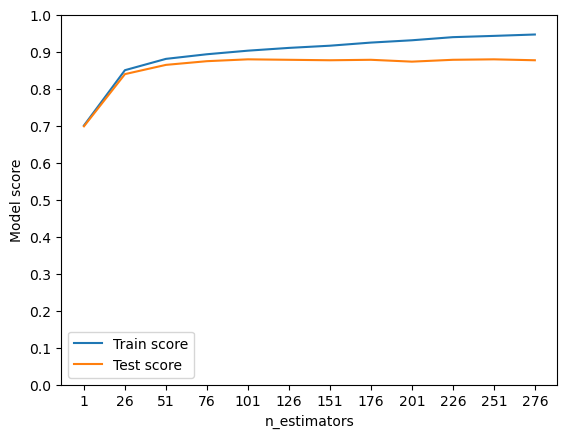

In [26]:
plt.plot(n_estimators, train_scores, label="Train score")
plt.plot(n_estimators, test_scores, label="Test score")
plt.ylim(0,1)
plt.xticks(np.arange(1,300,25))
plt.yticks(np.arange(0,1.1,0.1))
plt.xlabel("n_estimators")
plt.ylabel("Model score")
plt.legend()

print(f"Max Boosted Decision Tree score on the test data: {max(test_scores)*100:.2f}%")

In [27]:

f1_train_scores=[]
f1_test_scores=[]
# loop through 
for i in n_estimators:
    BDT.set_params(n_estimators=i )
    BDT.fit(X1_train,y1_train)
    y1_train_pred = BDT.predict(X1_train)
    y1_test_pred = BDT.predict(X1_test)
    # update the training scores list
    f1_train_scores.append(f1_score(y1_train,y1_train_pred))
    f1_test_scores.append(f1_score(y1_test,y1_test_pred))
    
    

In [28]:
f1_train_scores_max_depth_10=[]
f1_test_scores_max_depth_10=[]
# loop through 
for i in n_estimators:
    BDT.set_params(n_estimators=i, max_depth=10 )
    BDT.fit(X1_train,y1_train)
    y1_train_pred = BDT.predict(X1_train)
    y1_test_pred = BDT.predict(X1_test)
    # update the training scores list
    f1_train_scores_max_depth_10.append(f1_score(y1_train,y1_train_pred))
    f1_test_scores_max_depth_10.append(f1_score(y1_test,y1_test_pred))

f1_train_scores_max_depth_5=[]
f1_test_scores_max_depth_5=[]
# loop through 
for i in n_estimators:
    BDT.set_params(n_estimators=i, max_depth=5 )
    BDT.fit(X1_train,y1_train)
    y1_train_pred = BDT.predict(X1_train)
    y1_test_pred = BDT.predict(X1_test)
    # update the training scores list
    f1_train_scores_max_depth_5.append(f1_score(y1_train,y1_train_pred))
    f1_test_scores_max_depth_5.append(f1_score(y1_test,y1_test_pred))

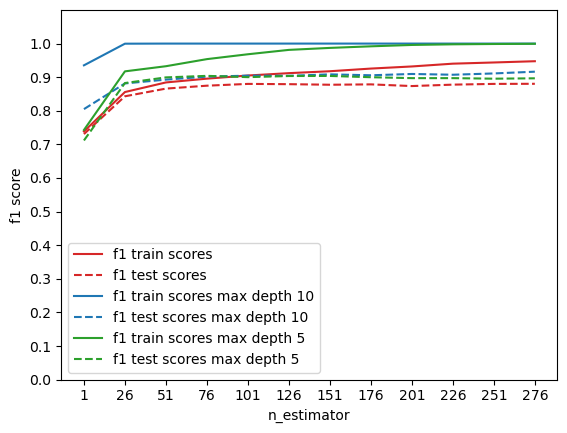

In [32]:
plt.plot(n_estimators, f1_train_scores, label="f1 train scores",color='C3',)
plt.plot(n_estimators, f1_test_scores, label="f1 test scores",color='C3', linestyle='--',)
plt.plot(n_estimators, f1_train_scores_max_depth_10, label="f1 train scores max depth 10",color='C0',)
plt.plot(n_estimators, f1_test_scores_max_depth_10, label="f1 test scores max depth 10",color='C0', linestyle='--',)
plt.plot(n_estimators, f1_train_scores_max_depth_5, label="f1 train scores max depth 5",color='C2',)
plt.plot(n_estimators, f1_test_scores_max_depth_5, label="f1 test scores max depth 5",color='C2', linestyle='--',)

plt.xticks(np.arange(1,300,25))
plt.ylim(0,1.1)
plt.yticks(np.arange(0,1.1,0.1))
plt.xlabel("n_estimator")
plt.ylabel("f1 score")
plt.legend()



In [33]:
params_grid = {
    'max_depth': range(1,20,2),
    'n_estimators': range(1,300,10),
    'min_samples_leaf':range(1,5),
}

In [34]:
grid_search = GridSearchCV(
    estimator=BDT,
    param_grid=params_grid,
    return_train_score=True,
    cv=4,
    verbose=5,
)

In [35]:
grid_search.fit(X1_train,y1_train)

Fitting 4 folds for each of 1200 candidates, totalling 4800 fits
[CV 1/4] END max_depth=1, min_samples_leaf=1, n_estimators=1;, score=(train=0.618, test=0.598) total time=   0.0s
[CV 2/4] END max_depth=1, min_samples_leaf=1, n_estimators=1;, score=(train=0.619, test=0.616) total time=   0.0s
[CV 3/4] END max_depth=1, min_samples_leaf=1, n_estimators=1;, score=(train=0.609, test=0.625) total time=   0.0s
[CV 4/4] END max_depth=1, min_samples_leaf=1, n_estimators=1;, score=(train=0.618, test=0.598) total time=   0.0s
[CV 1/4] END max_depth=1, min_samples_leaf=1, n_estimators=11;, score=(train=0.725, test=0.686) total time=   0.0s
[CV 2/4] END max_depth=1, min_samples_leaf=1, n_estimators=11;, score=(train=0.707, test=0.705) total time=   0.0s
[CV 3/4] END max_depth=1, min_samples_leaf=1, n_estimators=11;, score=(train=0.706, test=0.720) total time=   0.0s
[CV 4/4] END max_depth=1, min_samples_leaf=1, n_estimators=11;, score=(train=0.717, test=0.679) total time=   0.0s
[CV 1/4] END max_de

GridSearchCV(cv=4,
             estimator=GradientBoostingClassifier(max_depth=5,
                                                  n_estimators=276),
             param_grid={'max_depth': range(1, 20, 2),
                         'min_samples_leaf': range(1, 5),
                         'n_estimators': range(1, 300, 10)},
             return_train_score=True, verbose=5)

In [36]:
res = grid_search.cv_results_


In [37]:
res

{'mean_fit_time': array([6.74557686e-03, 2.75782347e-02, 5.25542498e-02, ...,
        8.14251423e+00, 7.90620714e+00, 8.21421182e+00]),
 'std_fit_time': array([0.0008314 , 0.00113424, 0.00357759, ..., 0.14023644, 0.06052016,
        0.12486244]),
 'mean_score_time': array([0.00175548, 0.00149429, 0.00199825, ..., 0.01691723, 0.01607376,
        0.01675379]),
 'std_score_time': array([0.0004366 , 0.00050819, 0.00070656, ..., 0.00061069, 0.00032337,
        0.00083434]),
 'param_max_depth': masked_array(data=[1, 1, 1, ..., 19, 19, 19],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[1, 1, 1, ..., 4, 4, 4],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[1, 11, 21, ..., 271, 281, 291],
              mask=[False, False, False, ..., False, False, False],
        

In [38]:
grid_search.best_params_

{'max_depth': 15, 'min_samples_leaf': 3, 'n_estimators': 251}

In [39]:
grid_search.score(X1_test,y1_test)

0.89875

In [40]:
grid_search.score(X1_train,y1_train)
model=grid_search.best_estimator_

In [41]:
from sklearn.model_selection import learning_curve, validation_curve

In [42]:

BDT_best = GradientBoostingClassifier(max_depth=15, min_samples_leaf=3, n_estimators=251)

In [43]:
train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(
        estimator=BDT_best,
        X=X1_train,
        y=y1_train,
        train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1 ],
        return_times = True 
)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
fit_time_mean = np.mean(fit_times, axis=1)
fit_time_std = np.std(fit_times, axis=1)
score_time_mean = np.mean(score_times, axis=1)
score_time_std = np.std(score_times, axis=1)

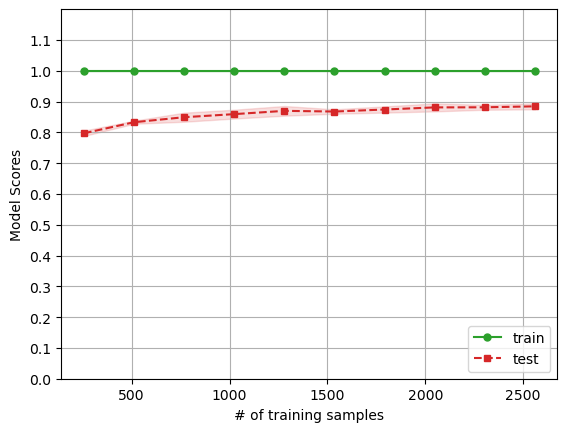

In [44]:
plt.plot(train_sizes, train_mean,
             color='C2', marker='o',
             markersize=5, label='train')

plt.fill_between(train_sizes,
                     train_mean + train_std,
                     train_mean - train_std,
                     alpha=0.15, color='C2')

plt.plot(train_sizes, test_mean,
             color='C3', linestyle='--',
             marker='s', markersize=5,
             label='test')

plt.fill_between(train_sizes,
                     test_mean + test_std,
                     test_mean - test_std,
                     alpha=0.15, color='C3')
plt.grid()
plt.ylim(0,1.2)
plt.yticks(np.arange(0,1.2,0.1))
plt.xlabel('# of training samples')
plt.ylabel('Model Scores')
plt.legend(loc='lower right')
plt.show()

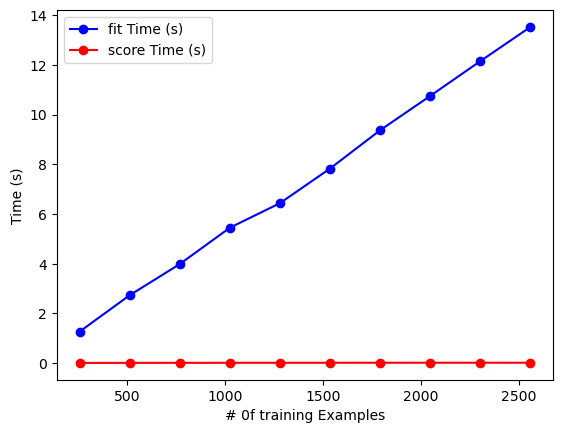

In [45]:
plt.figure()
# plt.title("Modeling Time: "+ title)
plt.xlabel("# 0f training Examples")
plt.ylabel("Time (s)")
# plt.fill_between(train_sizes, fit_time_mean - 2*fit_time_std, fit_time_mean + 2*fit_time_std, alpha=0.1, color="b")
# plt.fill_between(train_sizes, score_time_mean - 2*score_time_std, score_time_mean + 2*score_time_std, alpha=0.1, color="r")
plt.plot(train_sizes, fit_time_mean, 'o-', color="b", label="fit Time (s)")
plt.plot(train_sizes, score_time_mean, 'o-', color="r", label="score Time (s)")
plt.legend(loc="best")
plt.show()